In [1]:
from TrafficLight import SimpleTrafficLight, MemoryLessTrafficLight, MemoryLessTrafficLightMirror
import Model1
import Model2
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import numpy as np
from IPython.display import HTML

**Traffic lights**

In [2]:
simple_ew1 = SimpleTrafficLight()
simple_ew1.initialize(period=60, time_delay=0)

simple_ns1 = SimpleTrafficLight()
simple_ns1.initialize(period=60, time_delay=30)

simple_ew2 = SimpleTrafficLight()
simple_ew2.initialize(period=60, time_delay=10)

simple_ns2 = SimpleTrafficLight()
simple_ns2.initialize(period=60, time_delay=40)

In [3]:
memoryless_ew1 = MemoryLessTrafficLight()
memoryless_ew1.initialize(green_to_red_rate=1/60, red_to_green_rate=1/60)

memoryless_ns1 = MemoryLessTrafficLightMirror()
memoryless_ns1.initialize(traffic_light=memoryless_ew1)

memoryless_ew2 = MemoryLessTrafficLight()
memoryless_ew2.initialize(green_to_red_rate=1/60, red_to_green_rate=1/60)

memoryless_ns2 = MemoryLessTrafficLightMirror()
memoryless_ns2.initialize(traffic_light=memoryless_ew2)

**Intersection network**

*M/M/1 queue model*

The following intersection network consists of two four-way intersections in a 1x2 grid, each 30 m wide and 250 m apart. Each vehicle moves 14 m/s (50.4 km/h) at full speed.

In [4]:
intersection_system_1 = Model1.IntersectionNetworkSimulator()
intersection_system_1.initialize(grid_dimensions=(1,2), grid_distance=250)
intersection_system_1.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_e=10)
intersection_system_1.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_w=10)
intersection_system_1.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=simple_ns1, traffic_light_ew=simple_ew1)
intersection_system_1.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=simple_ns2, traffic_light_ew=simple_ew2)

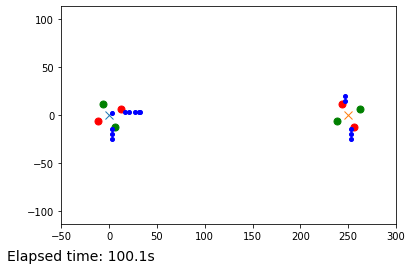

In [5]:
intersection_system_1.simulate(delta_t=0.1, end_time=100, animate=True, file_name="figs/simulation1.mp4", speed=3)

In [6]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="figs/simulation1.mp4" type="video/mp4">
</video></div>""")

Dictionary with simulation stats.

In [7]:
stats = intersection_system_1.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")

Average wait time: 14.727272727272764 s


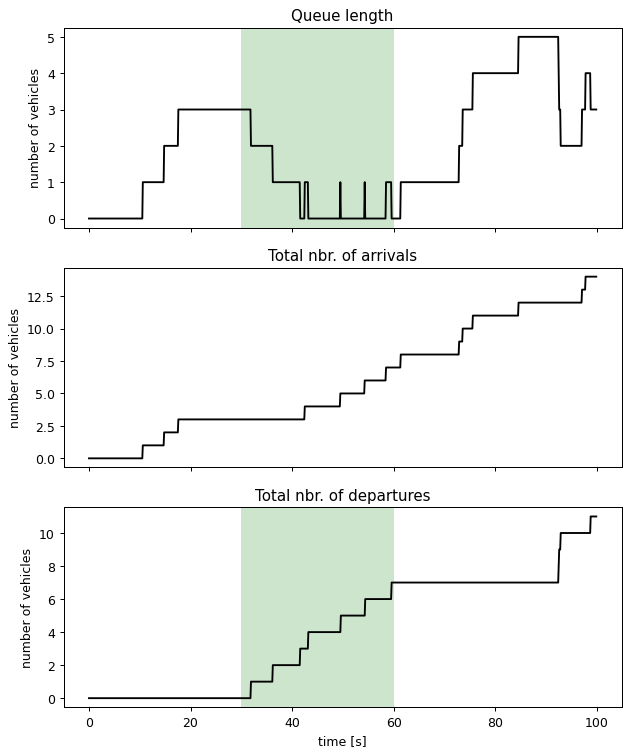

In [8]:
fig, axs = intersection_system_1.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=round(intersection_system_1.time), delta_t=0.1, traffic_light=simple_ns1,fig_size=(8,10))
plt.savefig('figs/northbound_(0,0)', bbox_inches='tight')

*Single queue with on/off memoryless service*

In [9]:
intersection_system_2 = Model2.IntersectionNetworkSimulator()
intersection_system_2.initialize(grid_dimensions=(1,2), grid_distance=250)
intersection_system_2.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_e=10)
intersection_system_2.set_queue_rate_parameters(grid_ind=(0,1), avg_departure_time=2, avg_arrival_time_n=10, avg_arrival_time_s=10, avg_arrival_time_w=10)
intersection_system_2.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=memoryless_ns1, traffic_light_ew=memoryless_ew1)
intersection_system_2.set_traffic_lights(grid_ind=(0,1), traffic_light_ns=memoryless_ns2, traffic_light_ew=memoryless_ew2)

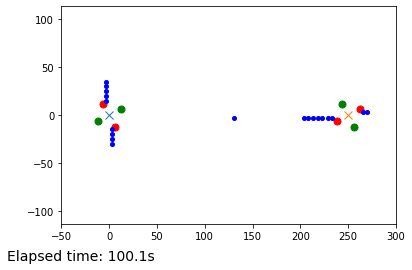

In [10]:
intersection_system_2.simulate(delta_t=0.1, end_time=100, animate=True, file_name="figs/simulation2.mp4", speed=3)

In [11]:
HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="figs/simulation2.mp4" type="video/mp4">
</video></div>""")

In [12]:
stats = intersection_system_2.get_stats()
print("Average wait time:", stats[(0,0)]["N"]["wait_time"], "s")

Average wait time: 1.6333333333333337 s


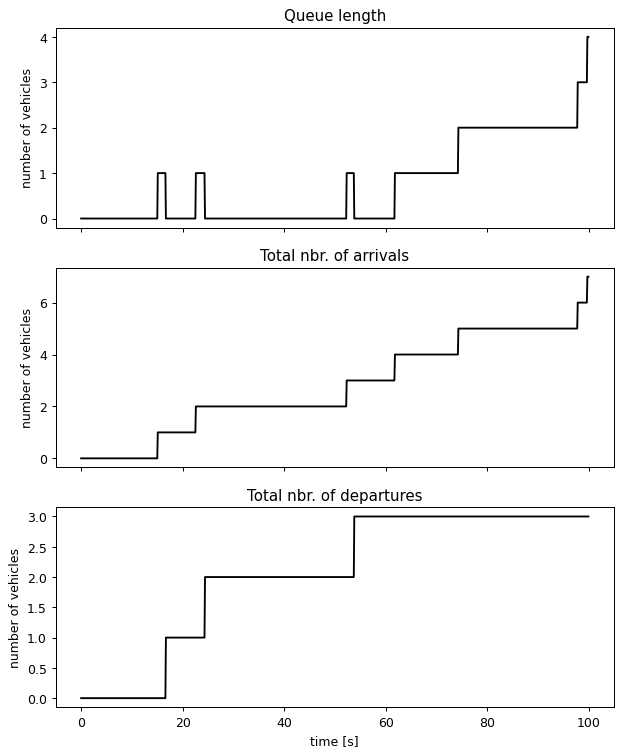

In [13]:
fig, axs = intersection_system_2.plot_queue_stats(plt=plt, grid_ind=(0,0), direction='N', end_time=round(intersection_system_2.time), delta_t=0.1, fig_size=(8,10))
#plt.savefig('figs/northbound_(0,0)', bbox_inches='tight')

In [14]:
bool(-0.0)

False